In [1]:
import healpy as hp

In [2]:
%matplotlib inline

In [3]:
import pickle
import mapsims
from collections import defaultdict

In [4]:
sim = mapsims.from_config(["common.toml", "noise.toml"], override={"channels":"tube:LT0"})

noise = sim.other_components["noise"]

In [5]:
ls output/noise

0000/                      N_ell_tube_LT2_2_of_4.pkl  N_ell_tube_LT4_4_of_4.pkl
N_ell_tube_LT0_1_of_4.pkl  N_ell_tube_LT2_3_of_4.pkl  N_ell_tube_LT4.pkl
N_ell_tube_LT0_2_of_4.pkl  N_ell_tube_LT2_4_of_4.pkl  N_ell_tube_LT5_1_of_4.pkl
N_ell_tube_LT0_3_of_4.pkl  N_ell_tube_LT2.pkl         N_ell_tube_LT5_2_of_4.pkl
N_ell_tube_LT0_4_of_4.pkl  N_ell_tube_LT3_1_of_4.pkl  N_ell_tube_LT5_3_of_4.pkl
N_ell_tube_LT0.pkl         N_ell_tube_LT3_2_of_4.pkl  N_ell_tube_LT5_4_of_4.pkl
N_ell_tube_LT1_1_of_4.pkl  N_ell_tube_LT3_3_of_4.pkl  N_ell_tube_LT5.pkl
N_ell_tube_LT1_2_of_4.pkl  N_ell_tube_LT3_4_of_4.pkl  N_ell_tube_LT6_1_of_4.pkl
N_ell_tube_LT1_3_of_4.pkl  N_ell_tube_LT3.pkl         N_ell_tube_LT6_2_of_4.pkl
N_ell_tube_LT1_4_of_4.pkl  N_ell_tube_LT4_1_of_4.pkl  N_ell_tube_LT6_3_of_4.pkl
N_ell_tube_LT1.pkl         N_ell_tube_LT4_2_of_4.pkl  N_ell_tube_LT6_4_of_4.pkl
N_ell_tube_LT2_1_of_4.pkl  N_ell_tube_LT4_3_of_4.pkl  N_ell_tube_LT6.pkl


In [6]:
cl = defaultdict(list)
for i_tube in range(7):
    for i in range(4):
        with open(f"output/noise/N_ell_tube_LT{i_tube}_{i+1}_of_4.pkl", "rb") as f:
            cl[i_tube].append(pickle.load(f))

In [7]:
import matplotlib.pyplot as plt

In [8]:
import mapsims

In [9]:
from glob import glob

In [10]:
import matplotlib
matplotlib.rc('text', usetex=False)
fontProperties = {'family':'sans-serif',
                  'weight' : 'normal', 'size' : 16}

In [11]:
import pickle

In [12]:
%matplotlib inline

In [13]:
sky_fractions = defaultdict(dict)
for i_tube in range(7):
    tube = f"LT{i_tube}"
    chs = mapsims.parse_channels("tube:"+tube)[0]
    hitmaps, _ = noise.get_hitmaps(tube)
    for i, h in enumerate(hitmaps):
        sky_fractions[tube][i]= (h>0).sum() / len(h)

/home/zonca/p/software/mapsims/mapsims/utils.py:76: UserWarning: Retrieve data for LT0_UHF1_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/zonca/p/software/mapsims/mapsims/utils.py:76: UserWarning: Retrieve data for LT0_UHF2_01_of_20.nominal_telescope_all_time_all_hmap.fits.gz (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/zonca/anaconda/envs/pysm3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/zonca/p/software/mapsims/mapsims/utils.py:76: UserWarning: Retrieve data for LT1

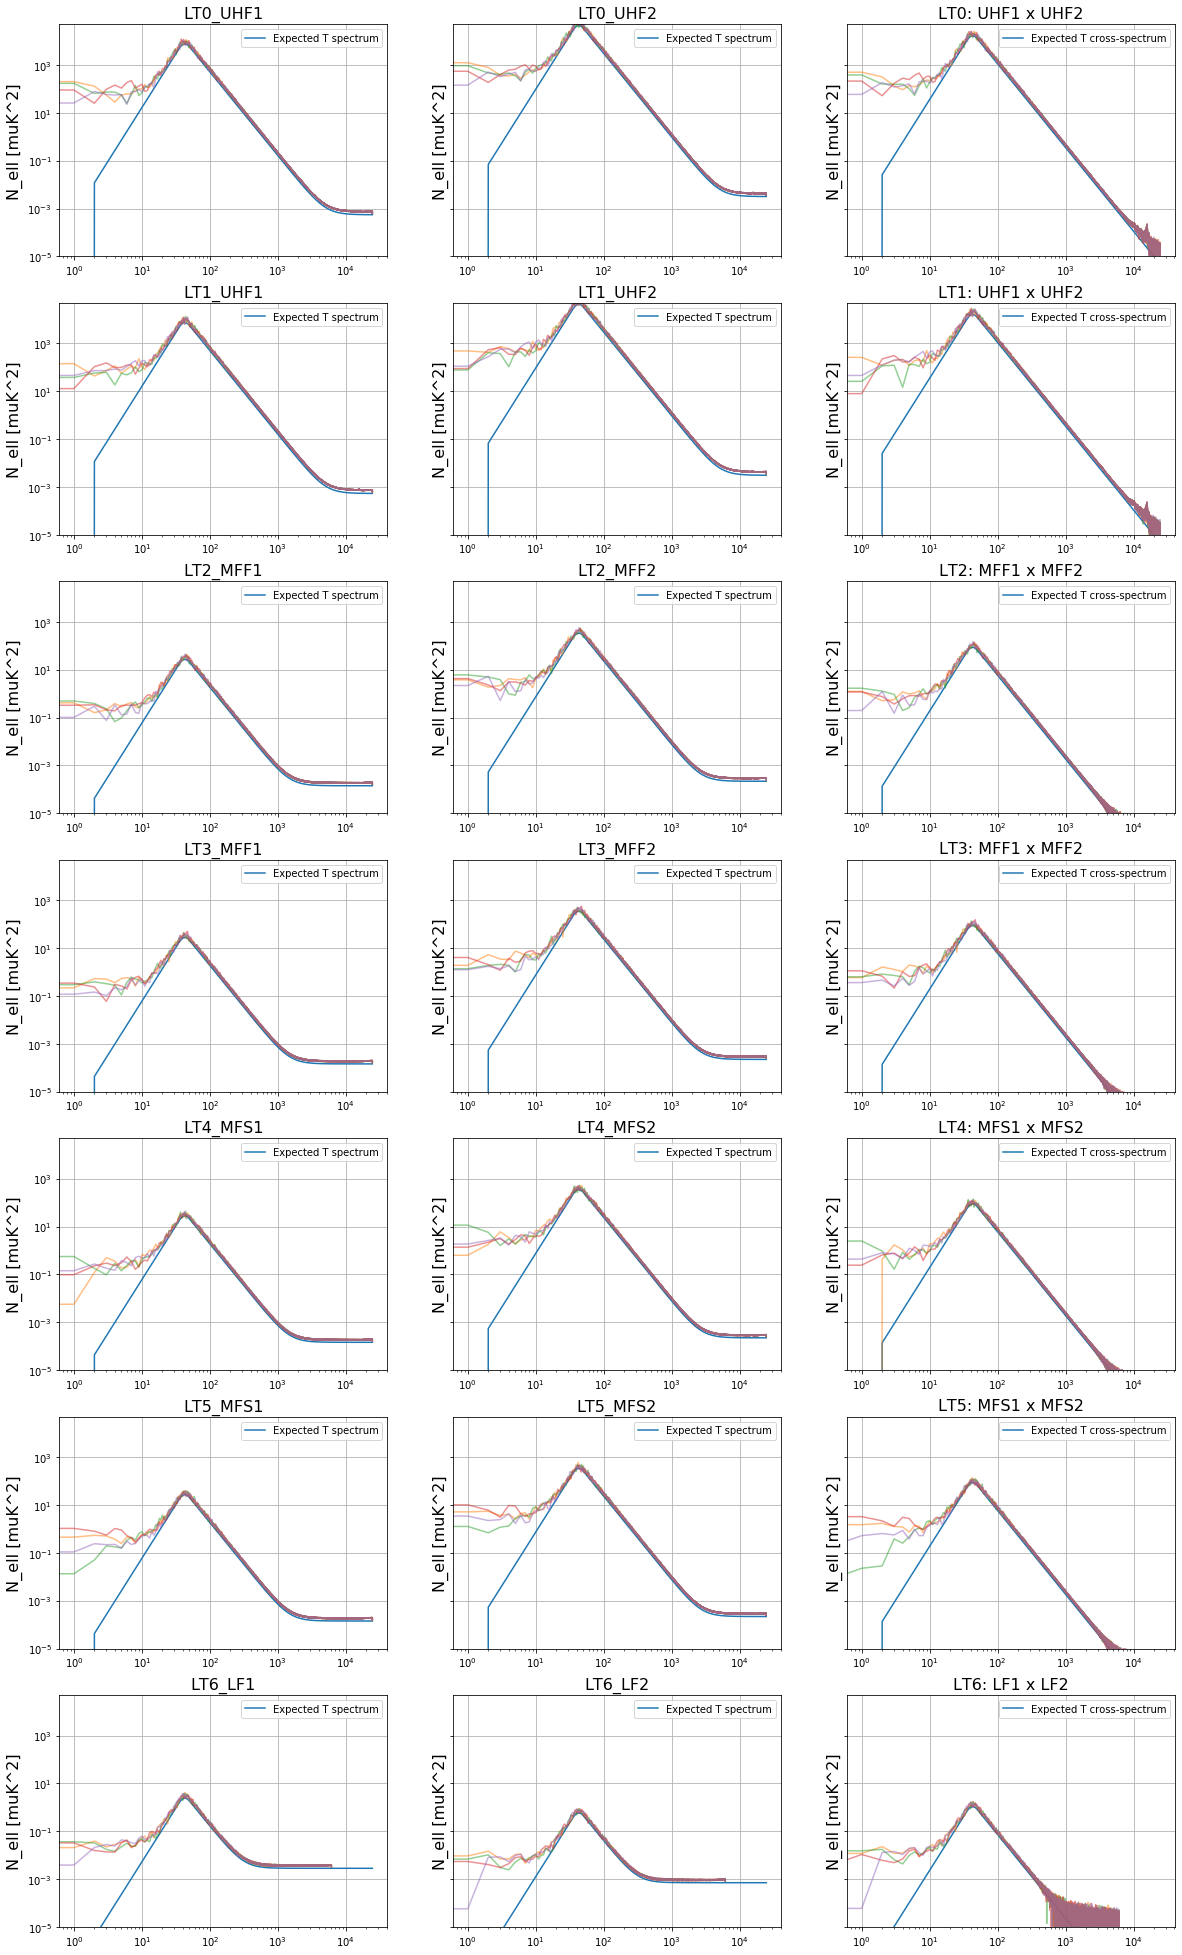

In [17]:
fig, ax = plt.subplots(nrows=7, ncols=3,sharey=True, figsize=(20, 5*7))
pol = 0
i_tube = 0
for (tube, chs) in noise.tubes.items():
    if tube.startswith("L"):
        ell, ps_T, ps_P = noise.get_fullsky_noise_spectra(tube=tube)
    
        m = {}
        for i, ch in enumerate(chs):
            len_cl = len(cl[i_tube][i])
            ax[i_tube][i].loglog(ell, 4*ps_T[i] * sky_fractions[tube][i], label="Expected T spectrum" )
            
            for split in cl[i_tube]:
                ax[i_tube][i].loglog(split[i][pol], alpha=.5)

            ax[i_tube][i].set_ylim(1e-5,5e4)
            ax[i_tube][i].set_title(ch.tag, fontsize=16)
            
            ax[i_tube][i].set_ylabel(r"N_ell [muK^2]", fontsize=16)
        ax[i_tube][2].loglog(ell, 4*ps_T[2]* sky_fractions[tube][i], label="Expected T cross-spectrum"  )
        for split in cl[i_tube]:

            ax[i_tube][2].loglog(split[2][pol], alpha=.5)
        ax[i_tube][2].set_ylim(1e-5,5e4)

        ax[i_tube][2].set_title(tube + ": " + chs[0].band + " x " + chs[1].band, fontsize=16)
            
        ax[i_tube][2].set_ylabel(r"N_ell [muK^2]", fontsize=16)
        for each in ax[i_tube]:
            each.grid()
            each.legend()
        i_tube += 1
        
plt.savefig("plots/LAT_T_splits.png")

/home/zonca/anaconda/envs/pysm3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/zonca/anaconda/envs/pysm3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


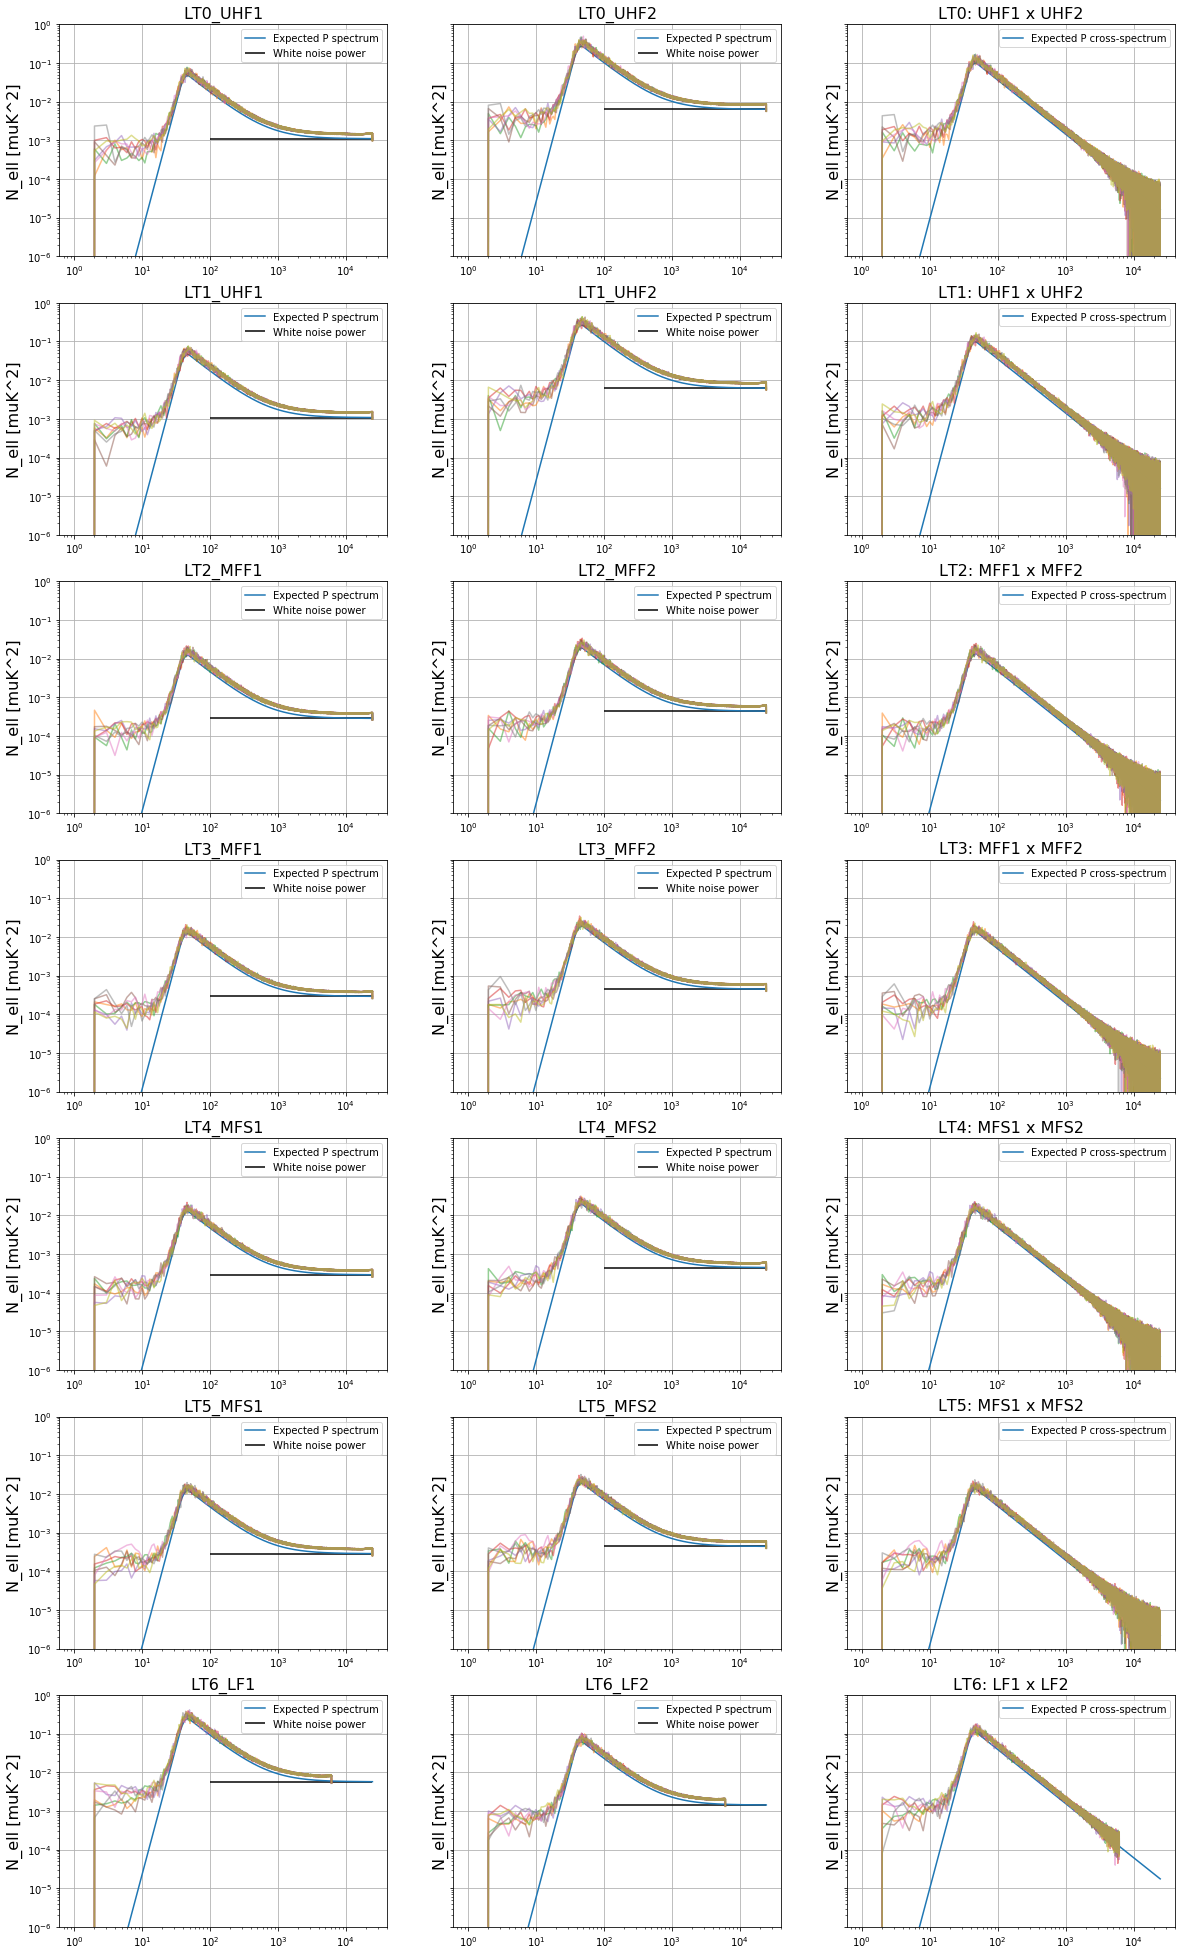

In [21]:
fig, ax = plt.subplots(nrows=7, ncols=3,sharey=True, figsize=(20, 5*7))
pol = 0
i_tube = 0
ylim = (1e-6, 1e0)
pol_label = "TQU"

for (tube, chs) in noise.tubes.items():
    ell, ps_T, ps_P = noise.get_fullsky_noise_spectra(tube=tube)
    if tube.startswith("L"):
    
        m = {}
        for pol in [1,2]:
            for i, ch in enumerate(chs):
                wn = noise.get_white_noise_power(tube, sky_fractions[tube][i])
                len_cl = len(cl[i_tube][i])
                if pol == 1:
                    ax[i_tube][i].loglog(ell, 4*ps_P[i]* sky_fractions[tube][i], label="Expected P spectrum" )
                    ax[i_tube][i].hlines(4*wn[i]*2, 100, ell[-1], label="White noise power")

                for split in cl[i_tube]:
                    ax[i_tube][i].loglog(split[i][pol], alpha=.5)
                ax[i_tube][i].set_ylim(*ylim)
                ax[i_tube][i].set_title(ch.tag, fontsize=16)

                ax[i_tube][i].set_ylabel(r"N_ell [muK^2]", fontsize=16)
            if pol == 1:
                ax[i_tube][2].loglog(ell, 4*ps_P[2]* sky_fractions[tube][i] , label="Expected P cross-spectrum")
            for split in cl[i_tube]:

                ax[i_tube][2].loglog(split[2][pol],  alpha=.5)
        ax[i_tube][2].set_ylim(*ylim)

        ax[i_tube][2].set_title(tube + ": " + chs[0].band + " x " + chs[1].band, fontsize=16)
            
        ax[i_tube][2].set_ylabel(r"N_ell [muK^2]", fontsize=16)
        for each in ax[i_tube]:
            each.grid()
            each.legend()
        i_tube += 1
        
plt.savefig("plots/LAT_P_splits.png")